In [53]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt

GIANT_FORMAT = {"with_labels" : False,
                "node_size": 10, "node_color": "red", "edgecolors": "black",
                "linewidths": 0.25, "edge_color": "black"}

In [43]:
df = pd.read_csv("datasets/netscience_edgelist.txt", delimiter=";", header=None, names=["source", "target", "reference"])

df["reference"] = df["reference"].apply(lambda x: re.sub("'", "\"", x)) #Movemos a formato de JSON estandar
df["reference"] = df["reference"].apply(json.loads).apply(pd.Series)    #Cargamos a json y desempaquetamos el dict con el Series.

In [40]:
#len(set(df.source.unique()).intersection(set(df.target.unique()))),

In [50]:
import networkx as nx

graph = nx.from_pandas_edgelist(df,"source","target", edge_attr="reference", create_using=nx.DiGraph())
reference = [i['reference'] for i in dict(graph.edges).values()]

def layouts(graph):
    return {
     "Spring": nx.layout.spring_layout(graph, seed=42),
     "Kamada Kawai": nx.layout.kamada_kawai_layout(graph),
     "Random": nx.layout.random_layout(graph, seed=42),
     "Shell": nx.layout.shell_layout(graph),
     "Spectral": nx.layout.spectral_layout(graph),
     "Spiral": nx.layout.spiral_layout(graph)
    }

g_layouts = layouts(graph)

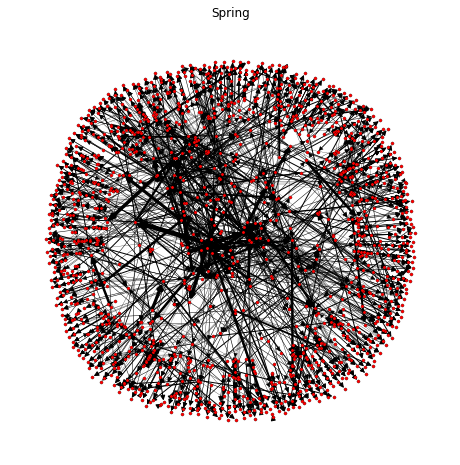

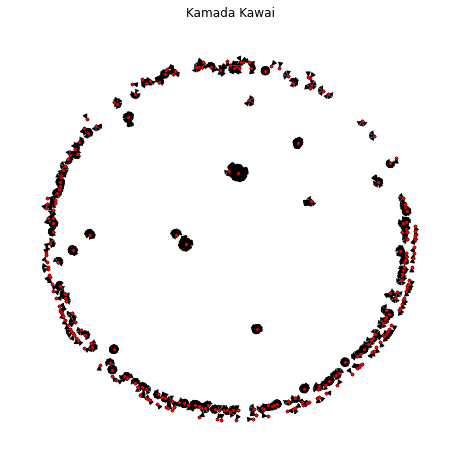

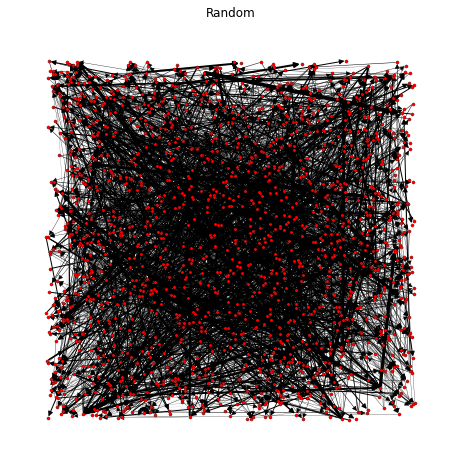

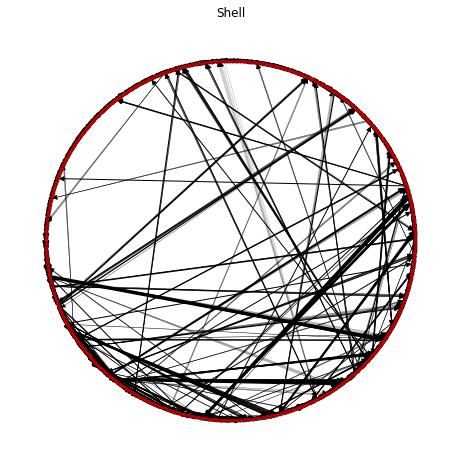

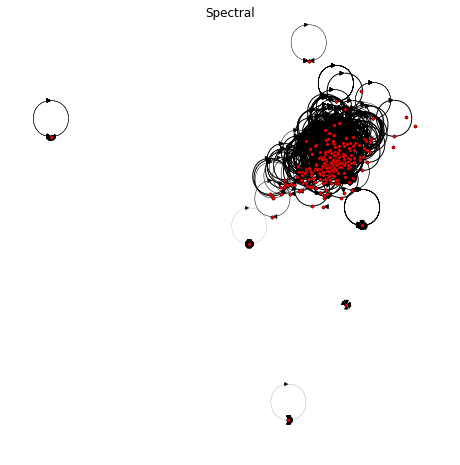

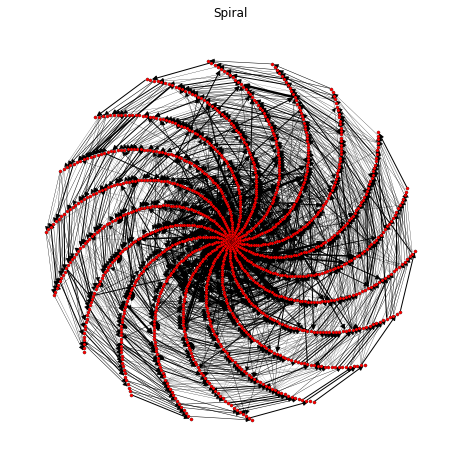

In [54]:
for k, l in g_layouts.items():
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    nx.draw(graph, width=reference, pos = l, ax=ax,**GIANT_FORMAT)
    ax.set_title(k)
    plt.show()